# Parabola Estimation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_and_Y = np.load('./parabola_estimation.npy')
old_X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
old_X.shape

(300,)

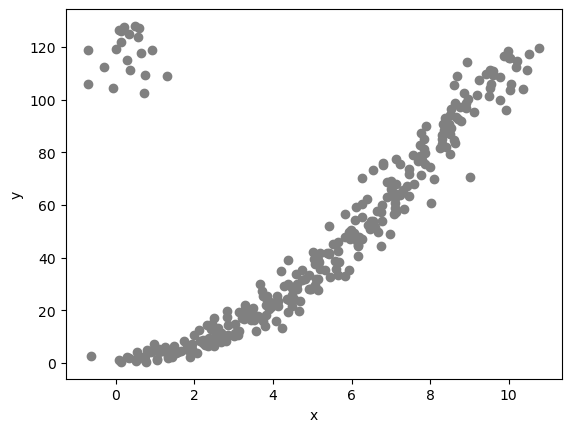

In [3]:
def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, color='orange')
        
    plt.scatter(old_X, Y, color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
vis(None, None, None)

#  Parabola Estimation with Squared L2 Norm

Shape of W: (3, 1)
y = 51.07 + -16.06*x + 2.36*x^2


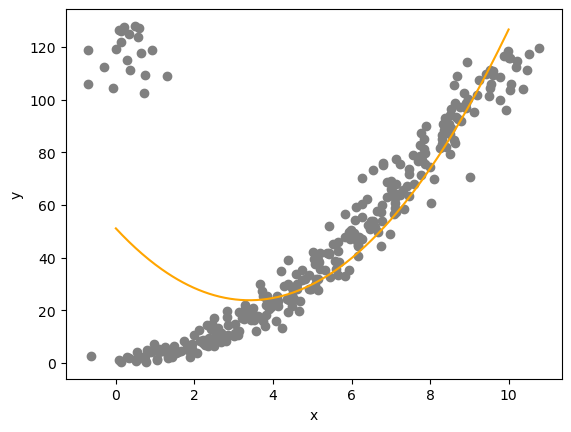

In [4]:
def l2_analytic_estimation(old_X, Y):
    # design matrix of shape (300,3)
    X = np.hstack((np.ones((old_X.shape[0], 1)), old_X[:, None], (old_X**2)[:, None]))

    # closed-form sol (W = (X^T X)^(-1) (X^T Y)
    W = np.linalg.pinv(X.T @ X) @ (X.T @ Y[:, None])
    print("Shape of W:", W.shape)
    
    w0, w1, w2 = W.flatten()
    return X, np.array([w0, w1, w2])

X, W = l2_analytic_estimation(old_X, Y)
w0, w1, w2 = W
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
vis(w0, w1, w2)

#  Parabola Estimation with Squared L2 Norm

In [ ]:
# Gradient of L(W) with respect to W 

def grad_L_W_ver1(X, Y, W):
    grad = X.T @ np.sign(X @ W - Y)
    assert grad.shape == (3,1)
    return grad

In [ ]:
# Estimating W, which defines the hyperplane using gradient descent (you need to add code to this cell as indicated below).
# y = w0 + w1*x + w2*x^2
def l1_grad_descent(X, Y):
    
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001

    # Gradient descent algorithm.
    # Step 1. Initialize the parameters W using np.zeros
    W = np.zeros((3,1))

    for i in range(iterations):
        # Step 2. Calculate the gradient of L(W) w.r.t. W. 
        grad = grad_L_W_ver1(X, Y, W)
        # Step 3. Update parameters W.
        W = W - learning_rate * grad 

    # Store the parameters of the parabola.
    w0, w1, w2 = np.array(W).reshape(-1)
    
    return np.array([w0,w1,w2])

# Visualization.
w0, w1, w2 = l1_grad_descent(X, Y)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
vis(w0, w1, w2)

## Parabola Estimation with Squared $L_2$ Norm and $L_1$ Norm

In [ ]:
# Gradient of L(W) with respect to W
def grad_L_W_ver2(X, Y, W, alpha):
    grad_l2 = 2.0 * (X.T @ (X @ W - Y)) # dim = (3,1)
    grad_l1 = X.T @ np.sign(X @ W - Y) # dim = (3,1)
    grad = alpha * grad_l2 + (1.0 - alpha) * grad_l1
    return grad

In [ ]:
def l1_l2_grad_descent(old_X, X, Y, alpha_list):
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001
    
    w_history = []
    # Loop over alpha(s).
    for alpha in alpha_list:
        
        # Gradient descent algorithm.
        # Step 1. Initialize the parameters W.
        W = np.zeros((3,1))
        for i in range(iterations):
            # Step 2. Calculate the gradient of L(W) w.r.t. W.
            grad = grad_L_W_ver2(X, Y, W, alpha)
            # Step 3. Update parameters W.
            W = W - (learning_rate * grad)

        # Get the parameters of the parabola.
        w0, w1, w2 = np.array(W).reshape(-1)
        w_history.append((w0,w1,w2))
        
    return np.array(w_history)

In [ ]:
# Estimate the parabolas given the list of alpha(s).
alphas = [0, 0.03, 0.05, 0.1, 1]
w_history = l1_l2_grad_descent(old_X, X, Y, alpha_list=alphas)

# print and plot the result
plt.scatter(old_X, Y, color='gray')
for alpha, ws in zip(alphas, w_history):
    w0, w1, w2 = ws
    
    # plot
    X_line = np.linspace(0,10,300)
    Y_line = w0 + w1 * X_line + w2 * (X_line**2)
    plt.plot(X_line, Y_line, label='alpha={}'.format(alpha))
    
    # print
    print('When alpha = {},'.format(alpha))
    print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**CODE EXPLANATION:** Looking at the graphs, we can see how alpha = 0 (L1 norm) does not get easily affected by the presence of outliers--where the starting point of the blue line (alpha = 0) does not get "dragged upwards" by the presence of outliers near 0. Then, as alpha increases from 0.03 to 0.05 and 0.1, the curve starts to bend more in the direction of the outliers. Finally, when it comes to alpha = 1 (L2 norm), this is the curve that is the most sensitive to outliers and thereby has the most noticeable "pull" towards the direction of the outliers.